<a href="https://colab.research.google.com/github/valeriagv14/Caso_practico_Python/blob/main/Diplomado_Ciencia_Datos_Modulo_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas openpyxl

In [2]:
import pandas as pd

In [17]:
!pip install seaborn

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
# Cargar archivo
df = pd.read_csv('mobile_usage_1.csv', encoding='utf-8')

#ver filas del DataFrame
print(df.head())


   User_ID  Age  Gender  Total_App_Usage_Hours  Daily_Screen_Time_Hours  \
0        1   56    Male                   2.61                     7.15   
1        2   46    Male                   2.13                    13.79   
2        3   32  Female                   7.28                     4.50   
3        4   25  Female                   1.20                     6.29   
4        5   38    Male                   6.31                    12.59   

   Number_of_Apps_Used  Social_Media_Usage_Hours  \
0                   24                      4.43   
1                   18                      4.67   
2                   11                      4.58   
3                   21                      3.18   
4                   14                      3.15   

   Productivity_App_Usage_Hours  Gaming_App_Usage_Hours     Location  
0                          0.55                    2.40  Los Angeles  
1                          4.42                    2.43      Chicago  
2                      

In [16]:
#verificar información
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   User_ID                       1000 non-null   int64  
 1   Age                           1000 non-null   int64  
 2   Gender                        1000 non-null   object 
 3   Total_App_Usage_Hours         1000 non-null   float64
 4   Daily_Screen_Time_Hours       1000 non-null   float64
 5   Number_of_Apps_Used           1000 non-null   int64  
 6   Social_Media_Usage_Hours      1000 non-null   float64
 7   Productivity_App_Usage_Hours  1000 non-null   float64
 8   Gaming_App_Usage_Hours        1000 non-null   float64
 9   Location                      1000 non-null   object 
dtypes: float64(5), int64(3), object(2)
memory usage: 78.2+ KB
None


In [15]:
# resumen estadístico
print(df.describe())

           User_ID          Age  Total_App_Usage_Hours  \
count  1000.000000  1000.000000            1000.000000   
mean    500.500000    38.745000               6.405670   
std     288.819436    12.186734               3.134855   
min       1.000000    18.000000               1.000000   
25%     250.750000    28.000000               3.590000   
50%     500.500000    40.000000               6.455000   
75%     750.250000    50.000000               9.122500   
max    1000.000000    59.000000              11.970000   

       Daily_Screen_Time_Hours  Number_of_Apps_Used  Social_Media_Usage_Hours  \
count              1000.000000           1000.00000               1000.000000   
mean                  7.696310             16.64700                  2.456330   
std                   3.714187              7.61961                  1.439525   
min                   1.010000              3.00000                  0.000000   
25%                   4.530000             10.00000                  1.2

In [25]:
#filtrar datos
filtered_data=(df["Gender"].value_counts())
print(filtered_data)

filtered_data2=(df["Location"].value_counts())
print(filtered_data2)


Gender
Male      517
Female    483
Name: count, dtype: int64
Location
New York       243
Phoenix        199
Chicago        192
Los Angeles    185
Houston        181
Name: count, dtype: int64


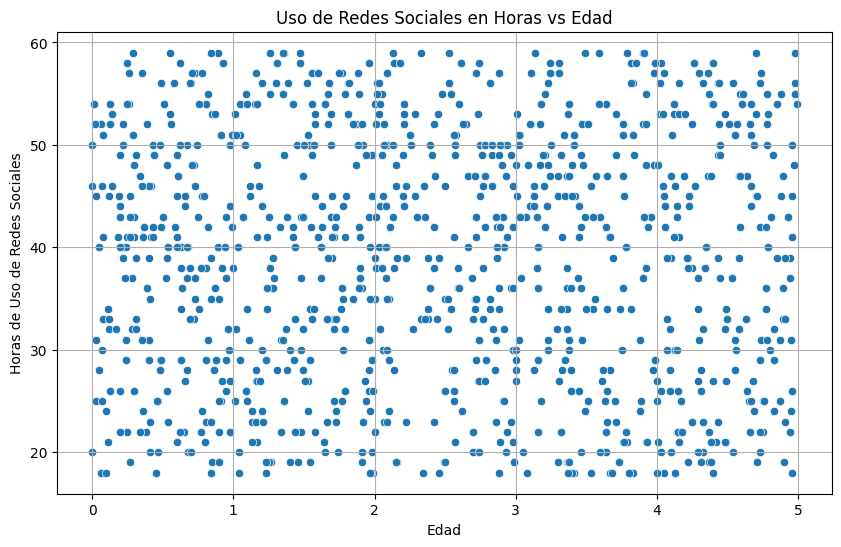

In [27]:
# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))  # Tamaño de la figura
sns.scatterplot(data=df, x='Social_Media_Usage_Hours', y='Age')

# Personalizar el gráfico
plt.title('Uso de Redes Sociales en Horas vs Edad')
plt.xlabel('Edad')
plt.ylabel('Horas de Uso de Redes Sociales')
plt.grid(True)  # Agregar una cuadrícula
plt.show()

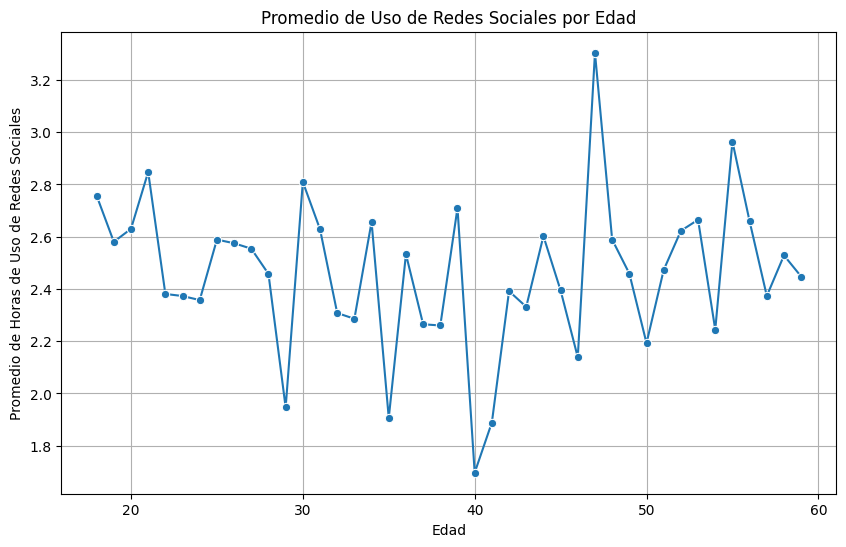

In [28]:
# Agrupar por edad y calcular la media de uso de redes sociales
mean_usage = df.groupby('Age')['Social_Media_Usage_Hours'].mean().reset_index()

# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))
sns.lineplot(data=mean_usage, x='Age', y='Social_Media_Usage_Hours', marker='o')

# Personalizar el gráfico
plt.title('Promedio de Uso de Redes Sociales por Edad')
plt.xlabel('Edad')
plt.ylabel('Promedio de Horas de Uso de Redes Sociales')
plt.grid(True)
plt.show()

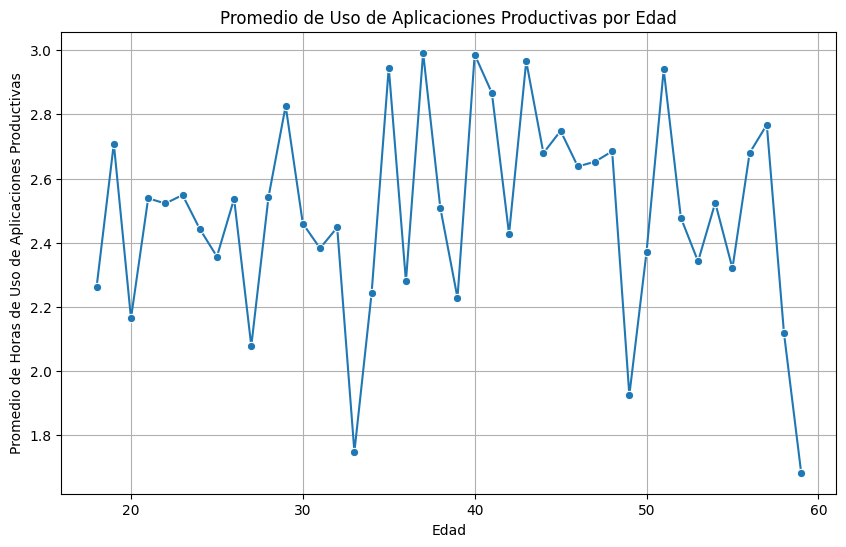

In [30]:
# Agrupar por edad y calcular la media de uso de aplicaciones productivas
mean_usage = df.groupby('Age')['Productivity_App_Usage_Hours'].mean().reset_index()

# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))
sns.lineplot(data=mean_usage, x='Age', y='Productivity_App_Usage_Hours', marker='o')

# Personalizar el gráfico
plt.title('Promedio de Uso de Aplicaciones Productivas por Edad')
plt.xlabel('Edad')
plt.ylabel('Promedio de Horas de Uso de Aplicaciones Productivas')
plt.grid(True)
plt.show()

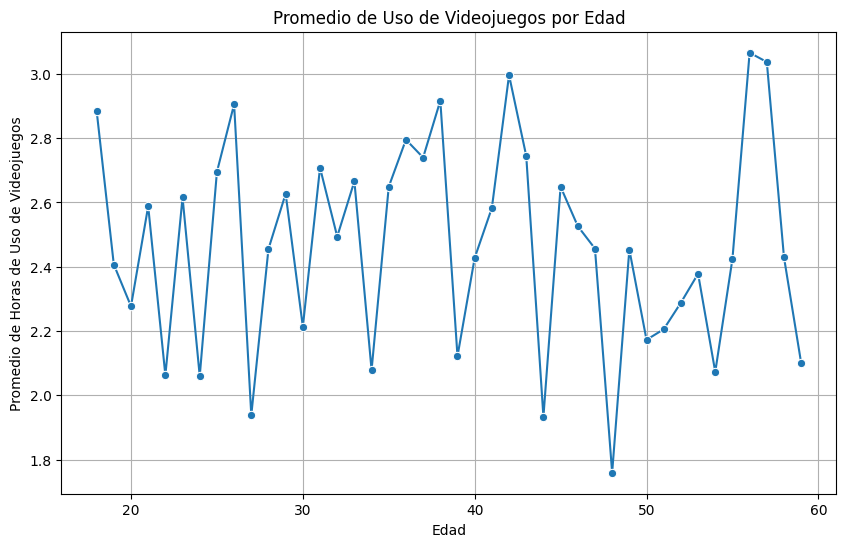

In [32]:
# Agrupar por edad y calcular la media de uso de videojuegos
mean_usage = df.groupby('Age')['Gaming_App_Usage_Hours'].mean().reset_index()

# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))
sns.lineplot(data=mean_usage, x='Age', y='Gaming_App_Usage_Hours', marker='o')

# Personalizar el gráfico
plt.title('Promedio de Uso de Videojuegos por Edad')
plt.xlabel('Edad')
plt.ylabel('Promedio de Horas de Uso de Videojuegos')
plt.grid(True)
plt.show()

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [37]:
X = df[['Age']]  # Características
y = df['Social_Media_Usage_Hours']  # Variable objetivo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo
model = LinearRegression()

# Ajustar el modelo a los datos de entrenamiento
model.fit(X_train, y_train)

# Predecir los valores en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

Mean Squared Error: 2.1596922889496204
R² Score: -0.00774936173178431


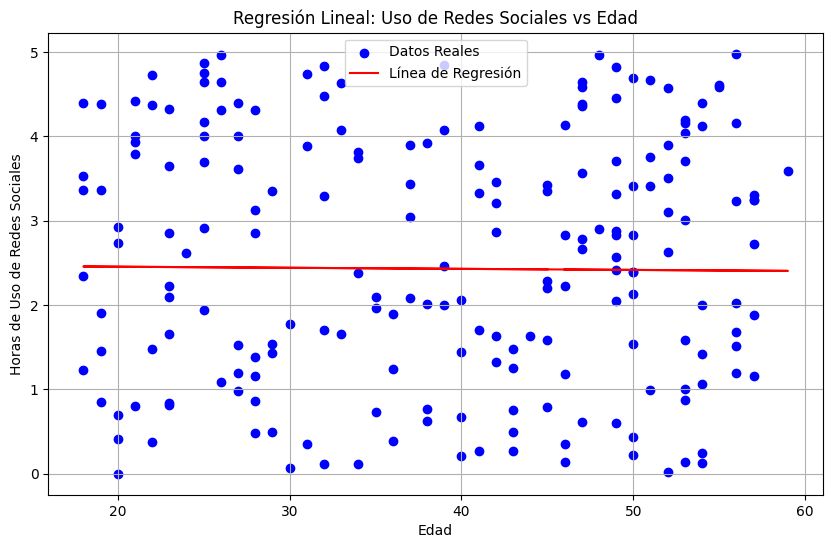

In [38]:
# Crear una gráfica de dispersión de los datos originales
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Datos Reales')

# Graficar la línea de regresión
plt.plot(X_test, y_pred, color='red', label='Línea de Regresión')

# Personalizar el gráfico
plt.title('Regresión Lineal: Uso de Redes Sociales vs Edad')
plt.xlabel('Edad')
plt.ylabel('Horas de Uso de Redes Sociales')
plt.legend()
plt.grid()
plt.show()

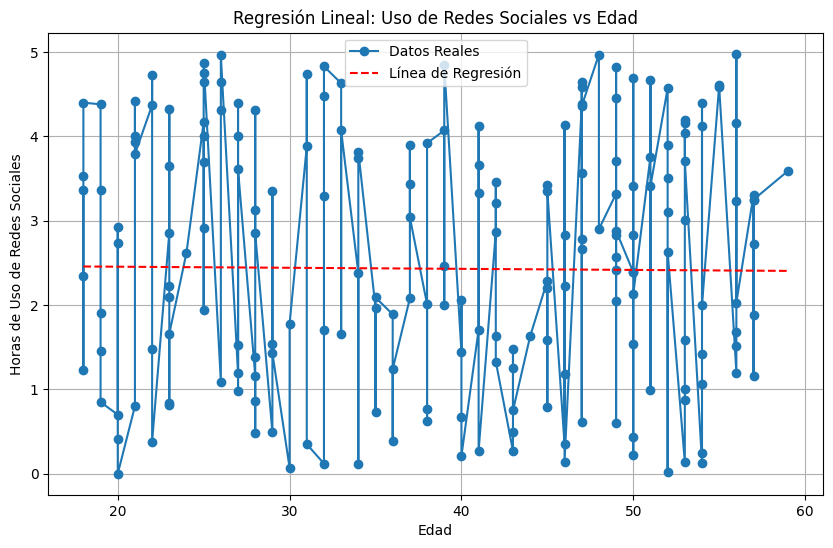

In [39]:
# Crear un DataFrame con los datos de prueba y las predicciones
results = pd.DataFrame({'Age': X_test['Age'], 'Actual': y_test, 'Predicted': y_pred})

# Ordenar por edad para un gráfico de líneas más limpio
results = results.sort_values(by='Age')

# Crear un gráfico de líneas
plt.figure(figsize=(10, 6))

# Graficar las líneas de los datos reales
plt.plot(results['Age'], results['Actual'], label='Datos Reales', marker='o', linestyle='-')

# Graficar la línea de regresión
plt.plot(results['Age'], results['Predicted'], label='Línea de Regresión', color='red', linestyle='--')

# Personalizar el gráfico
plt.title('Regresión Lineal: Uso de Redes Sociales vs Edad')
plt.xlabel('Edad')
plt.ylabel('Horas de Uso de Redes Sociales')
plt.legend()
plt.grid()
plt.show()

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [53]:
# Verificar los valores únicos en Location después de la conversión
print(df['Location'].unique())
print(df.columns)
print(df.head(10))  # Muestra las primeras 10 filas

[2 0 1 4 3]
Index(['User_ID', 'Age', 'Gender', 'Total_App_Usage_Hours',
       'Daily_Screen_Time_Hours', 'Number_of_Apps_Used',
       'Social_Media_Usage_Hours', 'Productivity_App_Usage_Hours',
       'Gaming_App_Usage_Hours', 'Location'],
      dtype='object')
   User_ID  Age  Gender  Total_App_Usage_Hours  Daily_Screen_Time_Hours  \
0        1   56     NaN                   2.61                     7.15   
1        2   46     NaN                   2.13                    13.79   
2        3   32     NaN                   7.28                     4.50   
3        4   25     NaN                   1.20                     6.29   
4        5   38     NaN                   6.31                    12.59   
5        6   56     NaN                   3.31                     1.04   
6        7   36     NaN                   4.81                     1.52   
7        8   40     NaN                   9.53                     8.85   
8        9   28     NaN                  11.35               

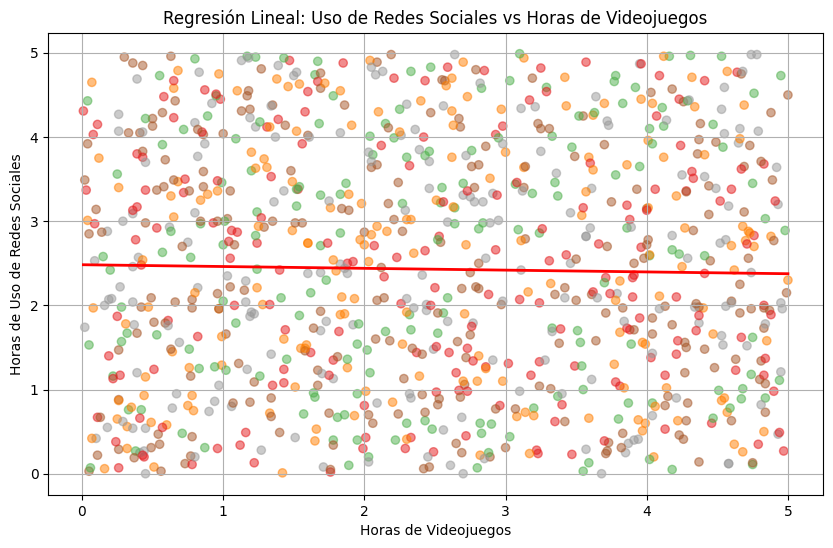

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df['Location'] = df['Location'].astype('category').cat.codes

# Definir las características y la variable objetivo
X = df[['Location', 'Gaming_App_Usage_Hours']]
y = df['Social_Media_Usage_Hours']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Crear el rango para graficar la línea de regresión
location_mean = df['Location'].mean()
x_range = pd.DataFrame({
    'Location': [location_mean, location_mean],  # Primero Location
    'Gaming_App_Usage_Hours': [df['Gaming_App_Usage_Hours'].min(), df['Gaming_App_Usage_Hours'].max()]  # Luego Gaming_App_Usage_Hours
})

# Predecir usando el modelo
y_line = model.predict(x_range)

# Graficar
plt.figure(figsize=(10, 6))

# Gráfico de dispersión
plt.scatter(df['Gaming_App_Usage_Hours'], df['Social_Media_Usage_Hours'], c=df['Location'], cmap='Set1', alpha=0.5)

# Graficar la línea de regresión
plt.plot(x_range['Gaming_App_Usage_Hours'], y_line, color='red', linewidth=2)

# Personalizar el gráfico
plt.title('Regresión Lineal: Uso de Redes Sociales vs Horas de Videojuegos')
plt.xlabel('Horas de Videojuegos')
plt.ylabel('Horas de Uso de Redes Sociales')
plt.grid()
plt.show()

Mean Squared Error: 2.1863858658323325
R² Score: -0.020205041276287528


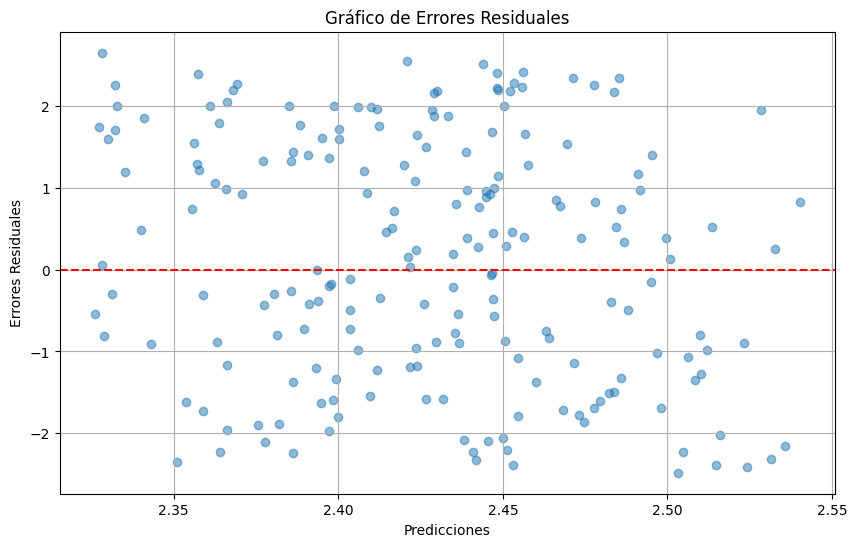

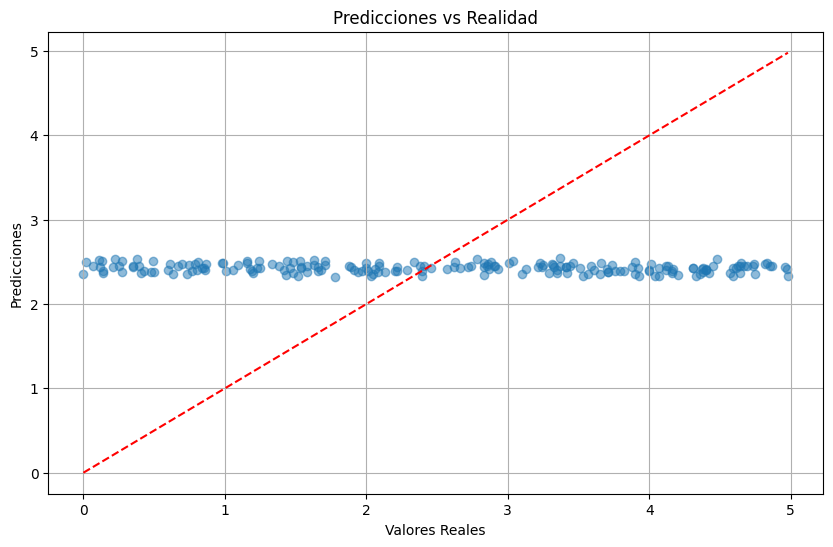

In [64]:
# ya se ha cargado la base de datos df y se ha hecho la conversión de Location
df['Location'] = df['Location'].astype('category').cat.codes

# Definir las características y la variable objetivo
X = df[['Location', 'Gaming_App_Usage_Hours']]
y = df['Social_Media_Usage_Hours']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Calcular MSE y R²
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

# Gráfico de errores residuales
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Gráfico de Errores Residuales')
plt.xlabel('Predicciones')
plt.ylabel('Errores Residuales')
plt.grid()
plt.show()

# Gráfico de Predicción vs Realidad
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Línea de referencia
plt.title('Predicciones vs Realidad')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.grid()
plt.show()